In [187]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

# Extrair os dados - [IPEA](http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view)

In [188]:
df_ipea = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE4/tech_challenge_4/dados/ipeadata.csv',  encoding='iso-8859-1',  sep=';')
df_ipea.head(5)

,Data,Preço - petróleo bruto - Brent (FOB)
0,20/05/1987,"18,63"
1,21/05/1987,"18,45"
2,22/05/1987,"18,55"
3,25/05/1987,"18,6"
4,26/05/1987,"18,63"


## Verificar base de dados (formato, informações, dados null, duplicidade)

In [189]:
print(f"\n----------------------------- Dimensões ----------------------------\n")
# Dimensões do DataFrame
print(df_ipea.shape)

print(f"\n---------------------------- Informação ----------------------------\n")
# Usando info()
df_ipea.info()

print(f"\n-------------------------- Valores nulos ---------------------------\n")
# Contagem de valores nulos
print(df_ipea.isnull().sum())

print(f"\n------------------------ Valores Duplicado ------------------------\n")
# Verificar duplicados
print(df_ipea.duplicated().sum())


----------------------------- Dimensões ----------------------------

(11188, 2)

---------------------------- Informação ----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11188 entries, 0 to 11187
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Data                                  11188 non-null  object
 1   Preço - petróleo bruto - Brent (FOB)  11188 non-null  object
dtypes: object(2)
memory usage: 174.9+ KB

-------------------------- Valores nulos ---------------------------

Data                                    0
Preço - petróleo bruto - Brent (FOB)    0
dtype: int64

------------------------ Valores Duplicado ------------------------

0


## Limpar e ajustar dados

In [190]:
def limpar_df_ipea(df_ipea):
    # Renomear colunas
    df_ipea.rename(columns={
        'Data': 'data',
        'Preço - petróleo bruto - Brent (FOB)': 'valor',
    }, inplace=True)

    # Tranformar coluna data em datetime
    df_ipea['data'] = pd.to_datetime(df_ipea['data'], format='%d/%m/%Y')

    # Tranformar valor para float
    df_ipea['valor'] = df_ipea['valor'].str.replace(',', '.').astype(float)

    # Ordenar os dados por data (do mais antigo para o mais atual)
    df_ipea.sort_values(by=['data'], ascending=True, inplace=True)

    # Data como index
    df_ipea.set_index('data', inplace=True)

limpar_df_ipea(df_ipea)

In [191]:
# Percentual
df_ipea['percentual'] = df_ipea['valor'] / 100

# Criar coluna de ano
df_ipea['ano'] = pd.DatetimeIndex(df_ipea.index).year

# Criar coluna de 'Decada'
df_ipea['decada'] = (df_ipea['ano'].astype(int) // 10) * 10

In [192]:
df_ipea.head(5)

,valor,percentual,ano,decada
data,,,,
1987-05-20,18.63,0.1863,1987,1980
1987-05-21,18.45,0.1845,1987,1980
1987-05-22,18.55,0.1855,1987,1980
1987-05-25,18.60,0.1860,1987,1980
1987-05-26,18.63,0.1863,1987,1980


In [193]:
print(df_ipea.index.min())
print(df_ipea.index.max())

1987-05-20 00:00:00
2024-06-10 00:00:00


# Análise de dados

In [194]:
df_ipea['valor'].describe()

count    11188.000000
mean        53.068262
std         33.217924
min          9.100000
25%         20.500000
50%         48.290000
75%         76.457500
max        143.950000
Name: valor, dtype: float64

## Grafico de linha do preço do petróleo bruto Brent (FOB) - IPEA

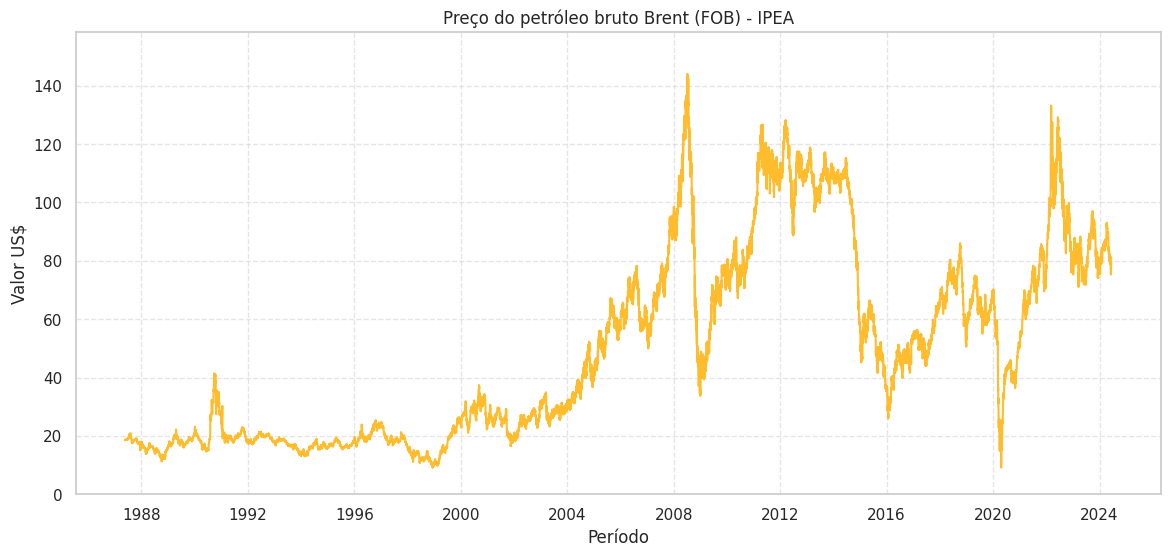

In [195]:
plt.figure(figsize=(14,6))

sns.lineplot(data=df_ipea, x="data", y="valor", color='#FFBD2D')

plt.title("Preço do petróleo bruto Brent (FOB) - IPEA")
plt.xlabel("Período")
plt.ylabel("Valor US$")
plt.grid(linestyle="--", alpha=0.5)
plt.ylim(0, df_ipea['valor'].max() * 1.1)

plt.show()

## Pontos historicos que influenciaram o preço do petróleo bruto

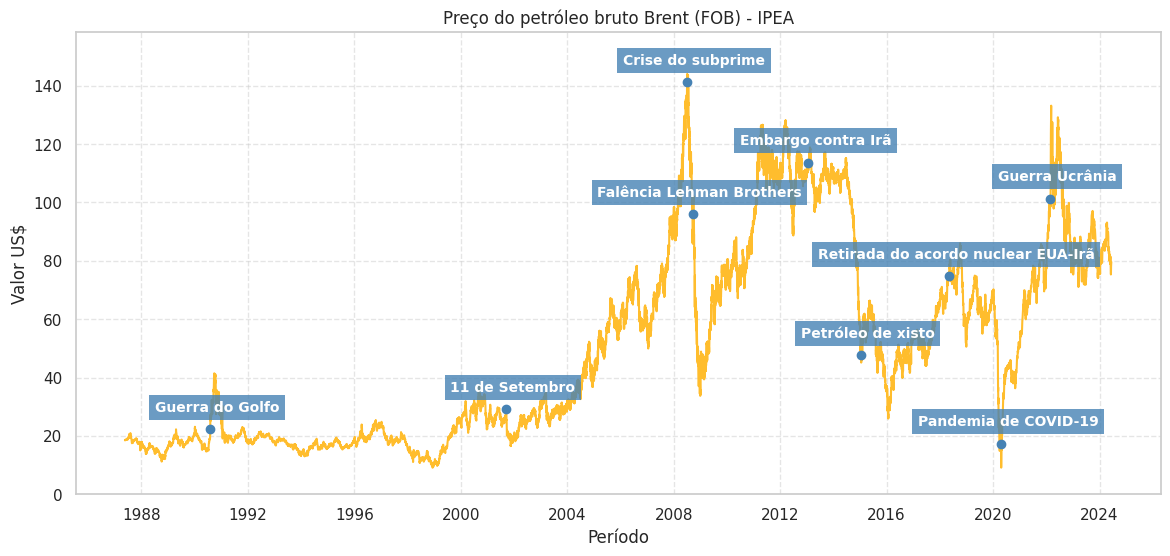

In [196]:
# Pontos historicos que influenciaram o preço do petróleo bruto
fig, ax = plt.subplots(figsize=(14, 6))

# Plotar a linha do preço do petróleo
sns.lineplot(data=df_ipea, x=df_ipea.index, y="valor", color='#FFBD2D', ax=ax)
# #4682b4
# Adicionar pontos de destaque com legendas
highlight_points = [
    # ('1987-10-19', 'Black Monday', 'tomato'),
    ('1990-08-02', 'Guerra do Golfo', 'steelblue'),
    ('2001-09-11', '11 de Setembro', 'steelblue'),
    ('2008-07-02', 'Crise do subprime', 'steelblue'),
    ('2008-09-15', 'Falência Lehman Brothers', 'steelblue'),
    ('2013-01-23', 'Embargo contra Irã', 'steelblue'),
    ('2015-01-13', 'Petróleo de xisto', 'steelblue'),
    ('2018-05-08', 'Retirada do acordo nuclear EUA-Irã', 'steelblue'),
    ('2020-04-20', 'Pandemia de COVID-19', 'steelblue'),
    ('2022-02-24', 'Guerra Ucrânia', 'steelblue')
]

for date, label, color in highlight_points:
    x = pd.to_datetime(date)
    y = df_ipea.loc[x, 'valor']
    ax.scatter(x, y, color=color, zorder=10)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(5, 13),
        ha='center',
        color='white',
        fontsize=10,
        fontweight='bold',
        bbox=dict(facecolor=color, alpha=0.8, edgecolor='none')
    )

ax.set_title("Preço do petróleo bruto Brent (FOB) - IPEA")
ax.set_xlabel("Período")
ax.set_ylabel("Valor US$")
ax.grid(linestyle="--", alpha=0.5)
ax.set_ylim(0, df_ipea['valor'].max() * 1.1)

plt.show()


## Boxplot de preço por ano

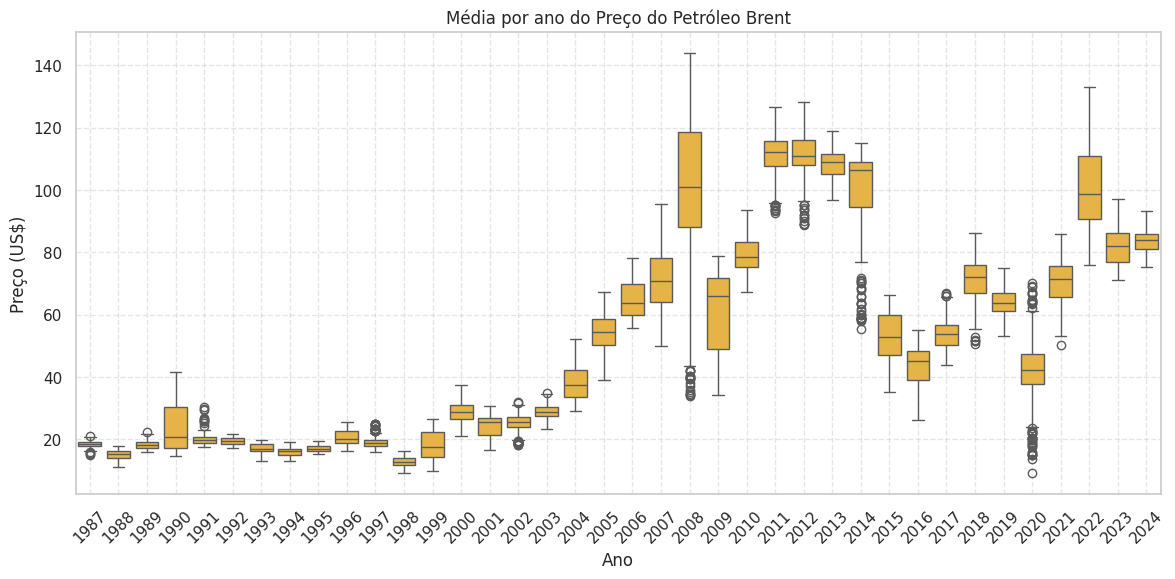

In [197]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(data=df_ipea, x='ano', y='valor', ax=ax, color='#FFBD2D')

ax.set_title('Média por ano do Preço do Petróleo Brent')
ax.set_xlabel('Ano')
ax.set_ylabel('Preço (US$)')

plt.xticks(rotation=45)
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


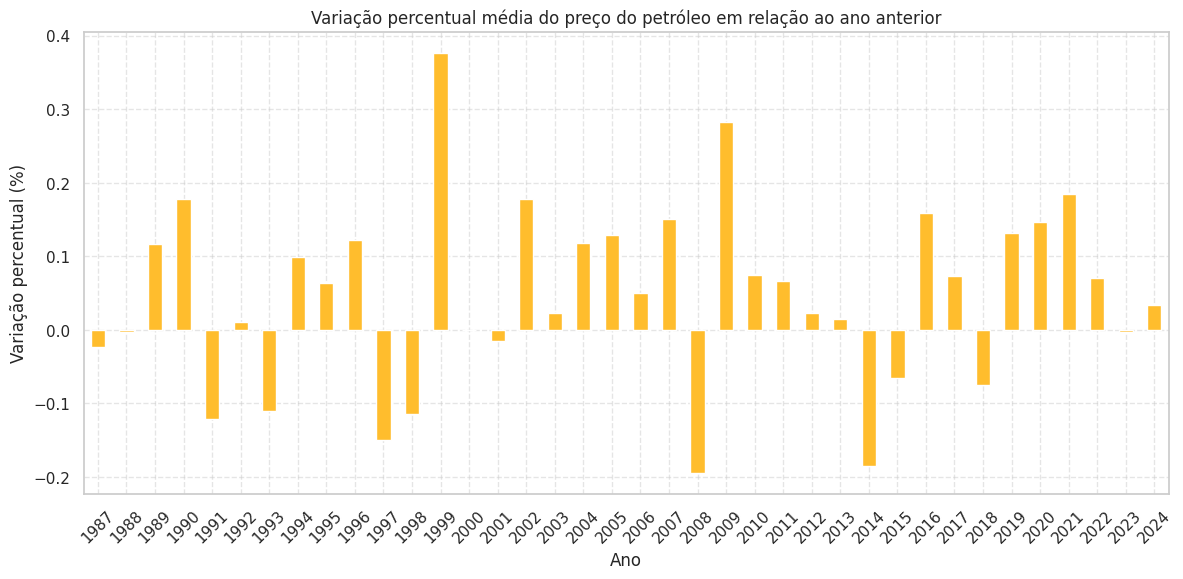

In [198]:
# Calcular a variação percentual média do preço do petróleo em relação ao ano anterior
df_ipea['var_pct_ano_anterior'] = (df_ipea['valor'] - df_ipea['valor'].shift(1)) / df_ipea['valor'].shift(1) * 100

# Agrupar por ano e calcular a média da variação percentual
df_ipea_ano = df_ipea.groupby('ano')['var_pct_ano_anterior'].mean()

# Criar um gráfico de barras
df_ipea_ano.plot(kind='bar', figsize=(14, 6), color='#FFBD2D')

plt.title('Variação percentual média do preço do petróleo em relação ao ano anterior')
plt.xlabel('Ano')
plt.ylabel('Variação percentual (%)')

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

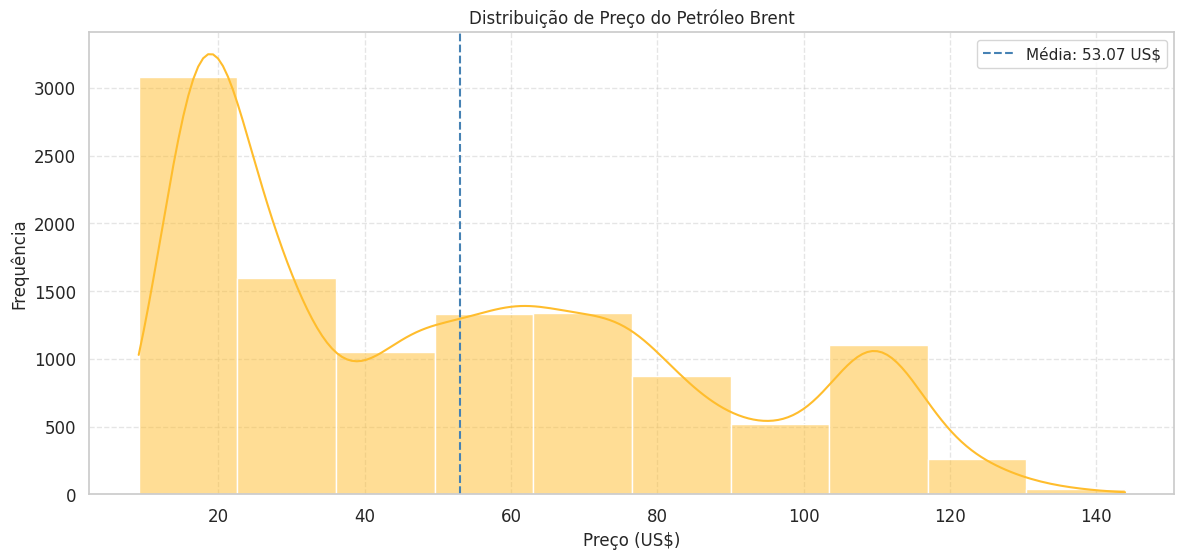

In [199]:
plt.figure(figsize=(14, 6))

sns.histplot(data=df_ipea, x='valor', bins=10, color='#FFBD2D', kde=True)

plt.title('Distribuição de Preço do Petróleo Brent')
plt.xlabel('Preço (US$)')
plt.ylabel('Frequência')

plt.grid(linestyle='--', alpha=0.5)

mean_valor = df_ipea['valor'].mean()
plt.axvline(mean_valor, color='#4682b4', linestyle='--', label=f'Média: {mean_valor:.2f} US$')
plt.legend()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [200]:
df_ipea.head()

,valor,percentual,ano,decada,var_pct_ano_anterior
data,,,,,
1987-05-20,18.63,0.1863,1987,1980,NaN
1987-05-21,18.45,0.1845,1987,1980,-0.966184
1987-05-22,18.55,0.1855,1987,1980,0.542005
1987-05-25,18.60,0.1860,1987,1980,0.269542
1987-05-26,18.63,0.1863,1987,1980,0.161290


In [201]:
df_ipea.to_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE4/tech_challenge_4/dados/ipeadata_limpo.csv', index=True)

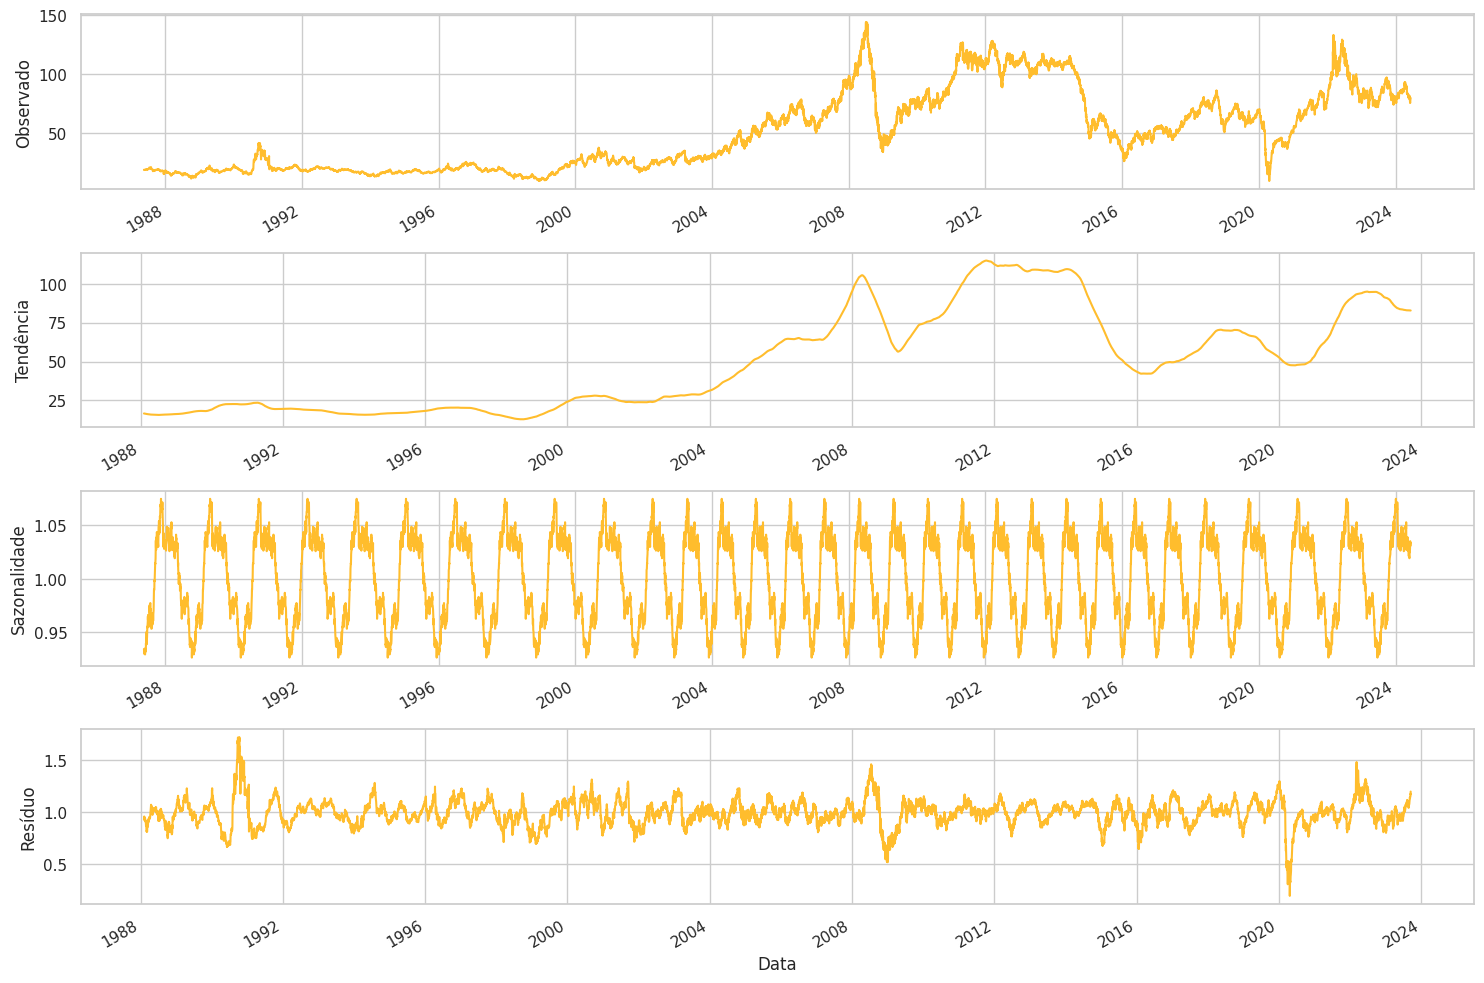

In [202]:
# Realizar a decomposição
result = seasonal_decompose(df_ipea['valor'], model='multiplicative', period=365)

# Plotar os componentes da decomposição
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))

color_fig='#FFBD2D'

result.observed.plot(ax=ax1, color=color_fig)
ax1.set_ylabel('Observado')
ax1.set_xlabel('')
ax1

result.trend.plot(ax=ax2, color=color_fig)
ax2.set_ylabel('Tendência')
ax2.set_xlabel('')

result.seasonal.plot(ax=ax3, color=color_fig)
ax3.set_ylabel('Sazonalidade')
ax3.set_xlabel('')

result.resid.plot(ax=ax4, color=color_fig)
ax4.set_ylabel('Resíduo')
ax4.set_xlabel('Data')

plt.tight_layout()
plt.show()


In [203]:
# Calcular a média móvel
df_ipea['media_movel'] = df_ipea['valor'].rolling(window=30).mean()  # Média móvel de 30 dias
# Calcular o desvio padrão móvel
df_ipea['desvio_padrao_movel'] = df_ipea['valor'].rolling(window=30).std()  # Desvio padrão móvel de 30 dias

In [204]:
# Calcular o Coeficiente de Variação (CV)
df_ipea['cv'] = df_ipea['desvio_padrao_movel'] / df_ipea['media_movel']

# Visualizar as primeiras linhas com o CV
df_ipea.head(10)  # Mostrar mais linhas para ver o CV calculado

,valor,percentual,ano,decada,var_pct_ano_anterior,media_movel,desvio_padrao_movel,cv
data,,,,,,,,
1987-05-20,18.63,0.1863,1987,1980,NaN,NaN,NaN,NaN
1987-05-21,18.45,0.1845,1987,1980,-0.966184,NaN,NaN,NaN
1987-05-22,18.55,0.1855,1987,1980,0.542005,NaN,NaN,NaN
1987-05-25,18.60,0.1860,1987,1980,0.269542,NaN,NaN,NaN
1987-05-26,18.63,0.1863,1987,1980,0.161290,NaN,NaN,NaN
1987-05-27,18.60,0.1860,1987,1980,-0.161031,NaN,NaN,NaN
1987-05-28,18.60,0.1860,1987,1980,0.000000,NaN,NaN,NaN
1987-05-29,18.58,0.1858,1987,1980,-0.107527,NaN,NaN,NaN
1987-06-01,18.65,0.1865,1987,1980,0.376749,NaN,NaN,NaN


> Coeficiente de Variação (CV): O CV é calculado como a razão entre o desvio padrão e a média móvel (df['cv'] = df['desvio_padrao_movel'] / df['media_movel']).




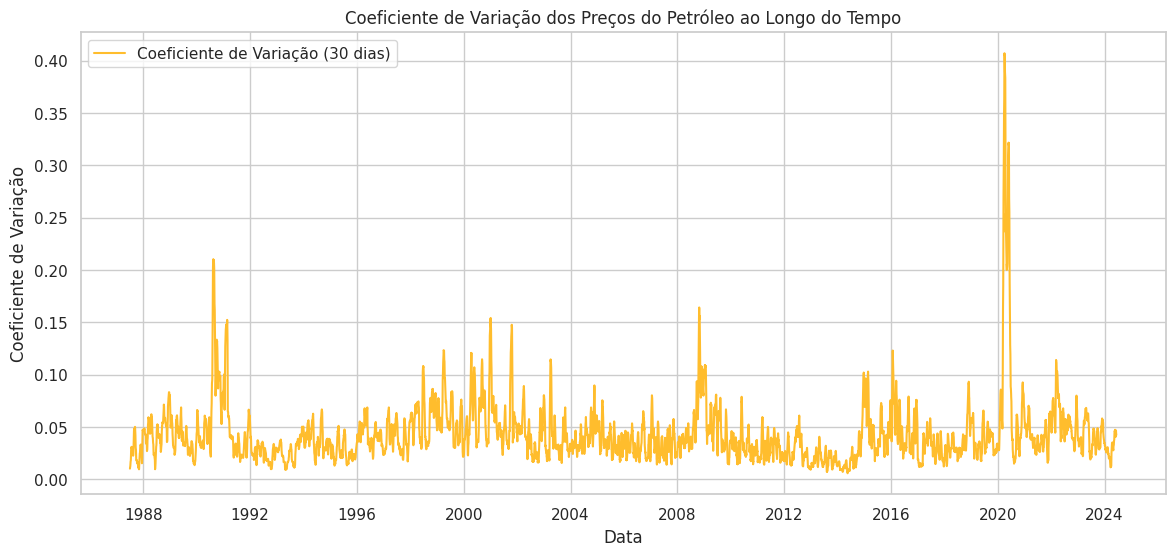

In [205]:
# Plotar o Coeficiente de Variação
plt.figure(figsize=(14, 6))
plt.plot(df_ipea['cv'], label='Coeficiente de Variação (30 dias)', color='#FFBD2D')
plt.title('Coeficiente de Variação dos Preços do Petróleo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Coeficiente de Variação')
plt.legend()
plt.grid(True)
plt.show()

In [206]:
# Reamostrar para frequência mensal e calcular os retornos percentuais mensais
df_mensal = df_ipea['valor'].resample('M').last()
df_mensal['var_pct_ano_anterior'] = df_mensal.pct_change() * 100

# Visualizar as primeiras linhas com os retornos mensais
print(df_mensal.head(10))  # Mostrar mais linhas para ver os retornos calculados

data
1987-05-31 00:00:00    18.58
1987-06-30 00:00:00    19.08
1987-07-31 00:00:00    20.03
1987-08-31 00:00:00    18.63
1987-09-30 00:00:00    18.48
1987-10-31 00:00:00     18.8
1987-11-30 00:00:00     17.7
1987-12-31 00:00:00     17.6
1988-01-31 00:00:00    16.28
1988-02-29 00:00:00    14.73
Name: valor, dtype: object


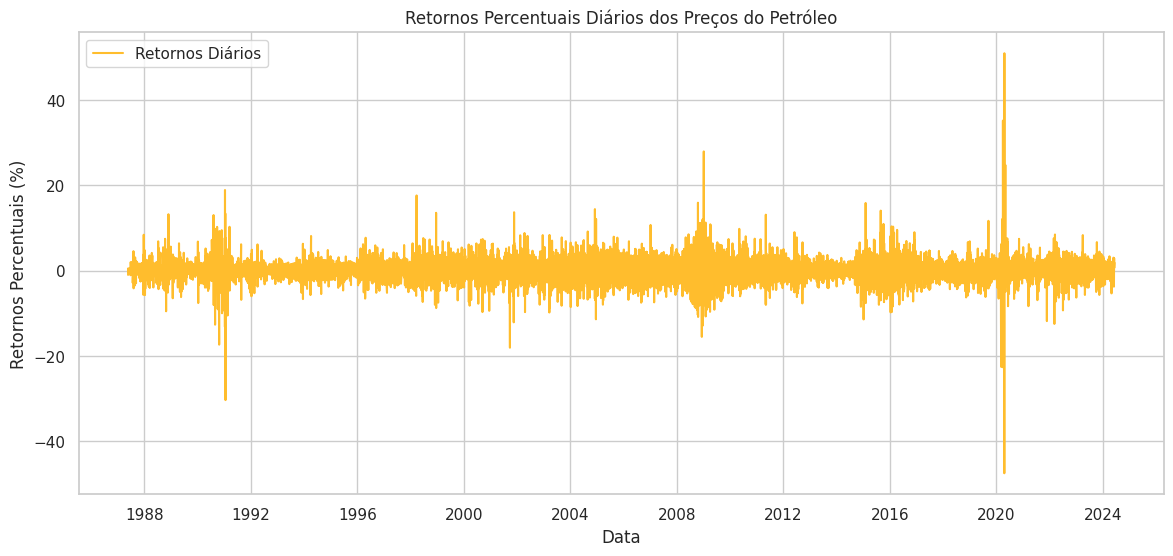

In [207]:
# Plotar os retornos percentuais diários
plt.figure(figsize=(14, 6))
plt.plot(df_ipea['var_pct_ano_anterior'], label='Retornos Diários', color='#FFBD2D')
plt.title('Retornos Percentuais Diários dos Preços do Petróleo')
plt.xlabel('Data')
plt.ylabel('Retornos Percentuais (%)')
plt.legend()
plt.grid(True)
plt.show()

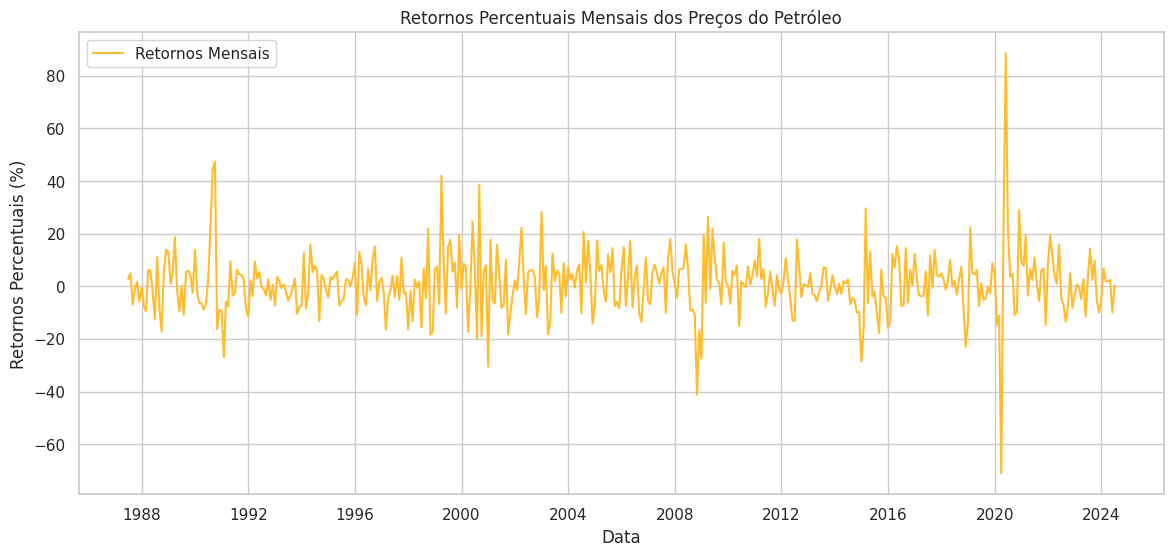

In [208]:
# Plotar os retornos percentuais mensais
plt.figure(figsize=(14, 6))
plt.plot(df_mensal['var_pct_ano_anterior'], label='Retornos Mensais', color='#FFBD2D')
plt.title('Retornos Percentuais Mensais dos Preços do Petróleo')
plt.xlabel('Data')
plt.ylabel('Retornos Percentuais (%)')
plt.legend()
plt.grid(True)
plt.show()

# Exporta dados